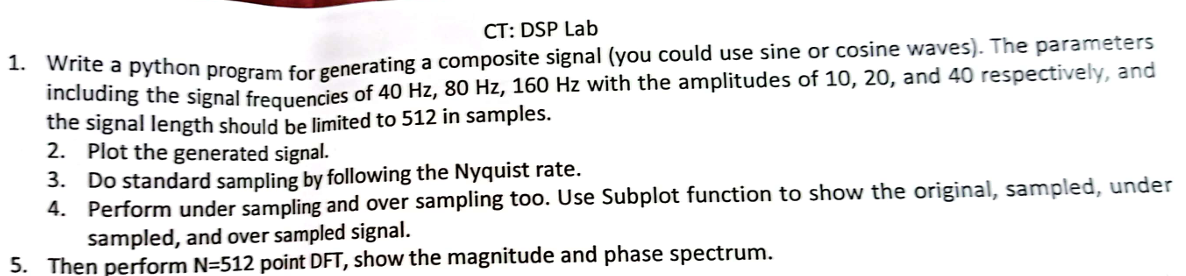

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

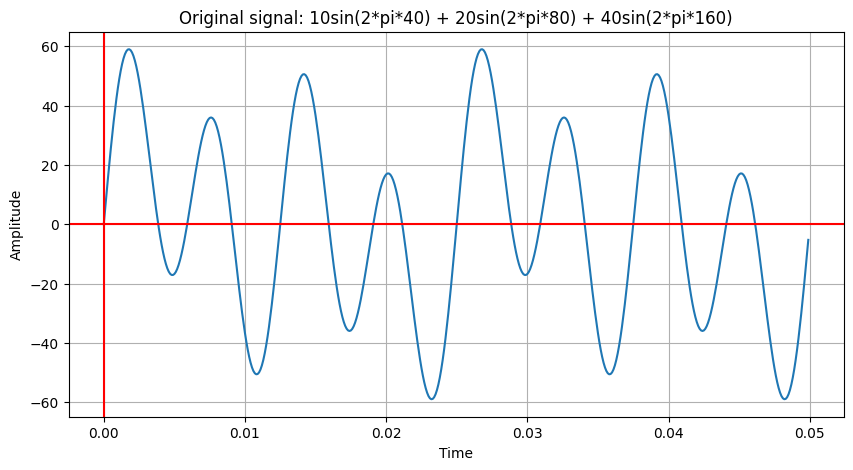

In [156]:
#Plotting

f1 = 40
f2 = 80
f3 = 160

a1 = 10
a2 = 20
a3 = 40

N = 512
start = 0
end = .05
sample_counts = 10000 * (end-start)

t = np.linspace(start, end, int(sample_counts), endpoint=False)
y = a1*np.sin(2*np.pi * f1 * t) + a2*np.sin(2*np.pi * f2 * t) + a3*np.sin(2*np.pi * f3 * t)

plt.figure(figsize=(10,5))
plt.plot(t,y)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Original signal: 10sin(2*pi*40) + 20sin(2*pi*80) + 40sin(2*pi*160)")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

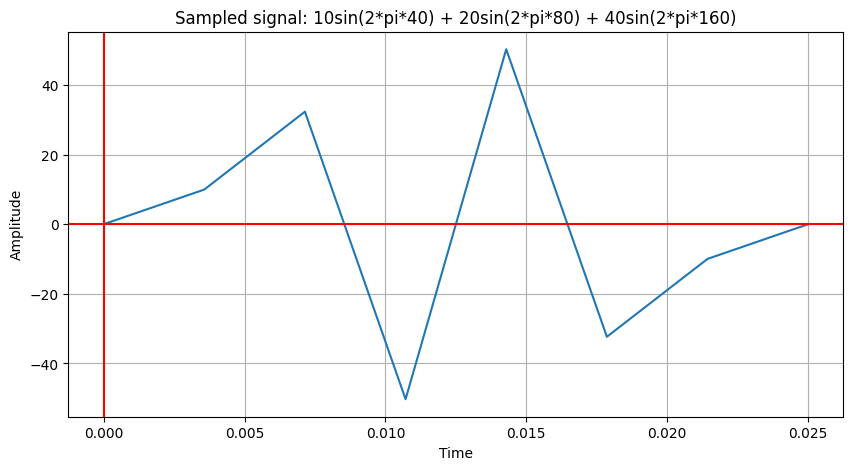

array([0.        , 0.00357143, 0.00714286, 0.01071429, 0.01428571,
       0.01785714, 0.02142857, 0.025     ])

In [171]:
#Plotting

f1 = 40
f2 = 80
f3 = 160

a1 = 10
a2 = 20
a3 = 40

N = 512
start = 0
end = .025
nyquist_rate = 160*2
sample_counts = nyquist_rate * (end-start)

x = np.linspace(start, end, int(sample_counts))
y_sampled = a1*np.sin(2*np.pi * f1 * x) + a2*np.sin(2*np.pi * f2 * x) + a3*np.sin(2*np.pi * f3 * x)

x_dft = x
y_dft = y_sampled

x = x[:20]
y_sampled = y_sampled[:20]

plt.figure(figsize=(10,5))
plt.plot(x,y_sampled)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Sampled signal: 10sin(2*pi*40) + 20sin(2*pi*80) + 40sin(2*pi*160)")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
x

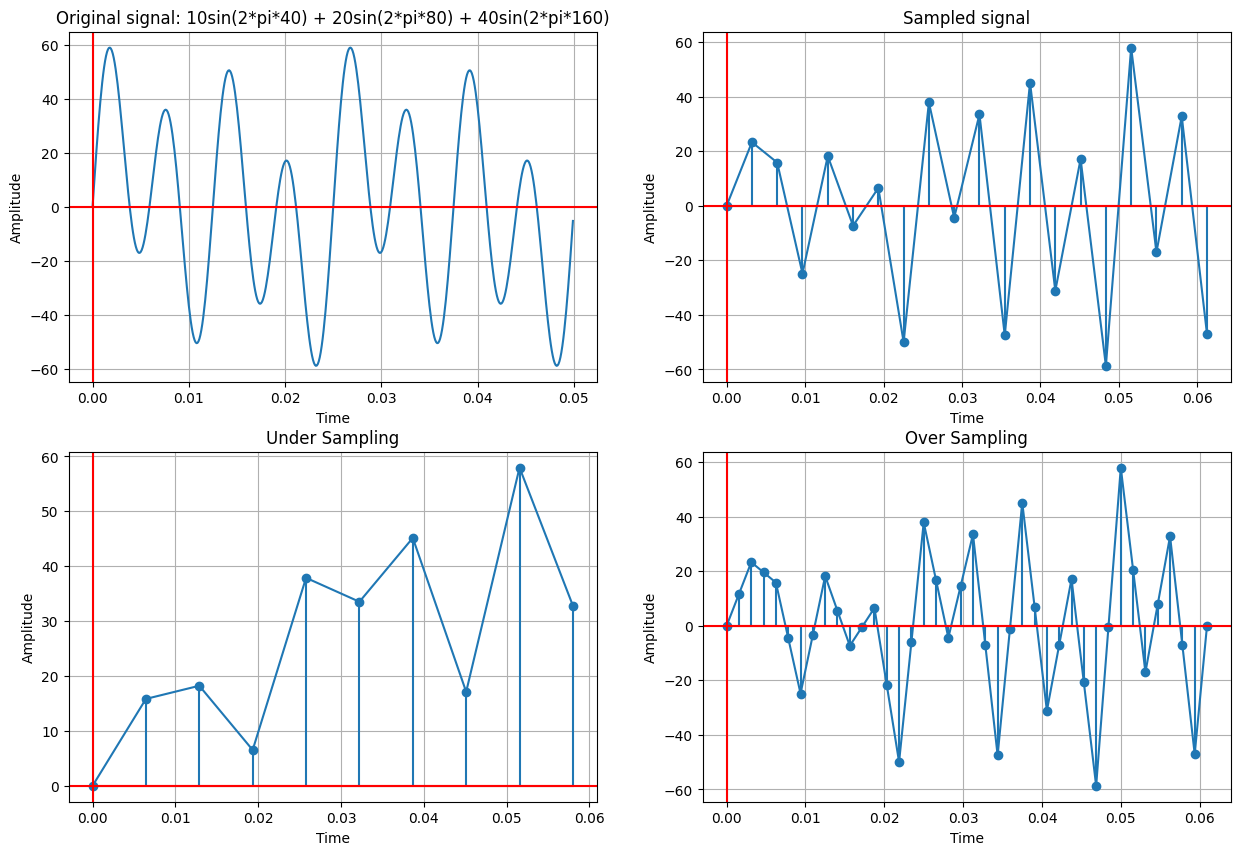

In [158]:
#Original signal
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(t,y)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Original signal: 10sin(2*pi*40) + 20sin(2*pi*80) + 40sin(2*pi*160)")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

#Sampled signal at  Nyquist rate
plt.subplot(2,2,2)
plt.stem(x,y_sampled)
plt.plot(x,y_sampled)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Sampled signal")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

#Under sampling
factor = 2
plt.subplot(2,2,3)
plt.stem(x[::factor],y_sampled[::factor])
plt.plot(x[::factor],y_sampled[::factor])
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Under Sampling")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

#Over sampling
over_sample = np.zeros(2*len(x[:]))
over_sample[::2] = y_sampled[:]
over_sampled_time = np.arange(len(over_sample))/(nyquist_rate*factor)

for i in range(1,len(over_sample)-1, 2):
    over_sample[i] = (over_sample[i-1] + over_sample[i+1])/2
    
#over_sample[1::2] = np.interp(over_sampled_time[1::2], x[:20], y_sampled[:20])

plt.subplot(2,2,4)
plt.stem(over_sampled_time, over_sample)
plt.plot(over_sampled_time, over_sample)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Over Sampling")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

In [183]:
def angl(real, img):
    if img == 0:
        return 0
    elif real == 0:
        if img > 0:
            return 90
        else:
            return -90
    else:
        return math.atan(img/real)*(180/np.pi)

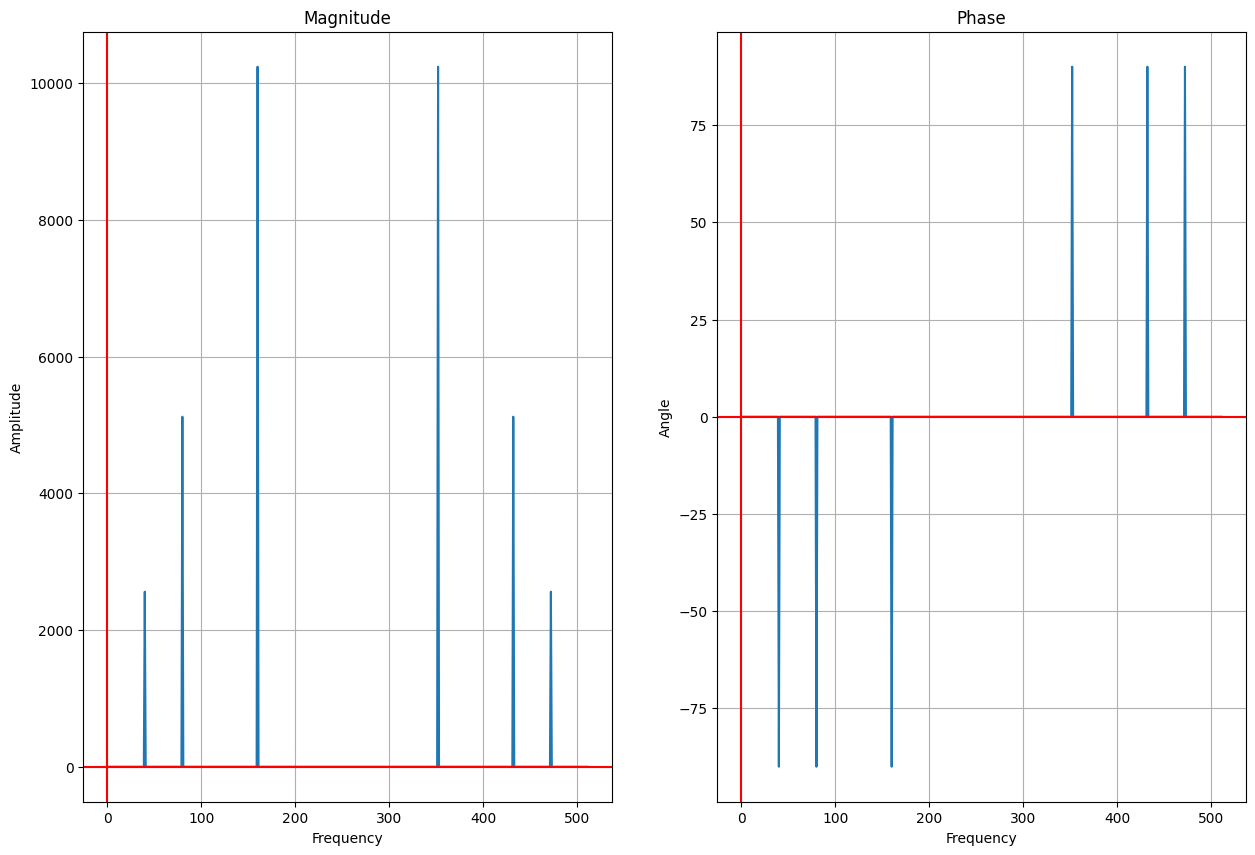

In [186]:
#DFT

N=512
X = np.zeros(N, dtype = complex)
phase = np.zeros(N)
x_dft = np.arange(0, 1, 1/N)
y_dft = a1*np.sin(2*np.pi * f1 * x_dft) + a2*np.sin(2*np.pi * f2 * x_dft) + a3*np.sin(2*np.pi * f3 * x_dft)
for m in range(0,N):
    for n in range(0,N):
        X[m] += y_dft[n] * np.exp((-2j * np.pi * n * m)/N)
X = np.round(X, 4)
magnitude = np.abs(X)
for i in range(N):
    phase[i] = angl(X[i].real, X[i].imag)

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(range(0,len(magnitude)), magnitude)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Magnitude")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(0,N), phase)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Phase")
plt.xlabel('Frequency')
plt.ylabel('Angle')
plt.grid()
#magnitude

array([0.        , 0.00357143, 0.00714286, 0.01071429, 0.01428571,
       0.01785714, 0.02142857, 0.025     ])

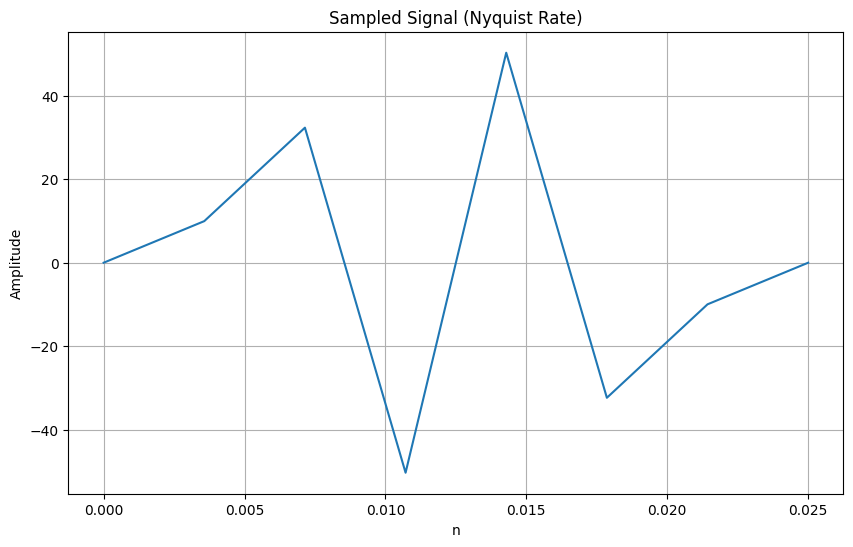

In [166]:
fs = 8  # 320 * 0.025 
t_nyquist = np.linspace(0, 0.025, fs)
y_nyquist = 10 * np.sin(2 * np.pi * 40 * t_nyquist) + 20 * \
    np.sin(2 * np.pi * 80 * t_nyquist) + 40 * \
    np.sin(2 * np.pi * 160 * t_nyquist)

plt.figure(figsize=(10, 6))
plt.plot(t_nyquist, y_nyquist)
plt.title("Sampled Signal (Nyquist Rate)")
plt.ylabel("Amplitude")
plt.xlabel("n")
plt.grid()
t_nyquist